---
# ↔️↔️Visualization of intervals/ranges/segments along a chromosome arm

In [1]:
## requirements
import pandas as pd
import matplotlib.pyplot as plt

## function from the chrov package
from chrov.viz.ranges import plot_ranges

In [2]:
## input parameters
chromosome='4'
arm='p'
test=False
# test=True
input_dir_path='inputs'
output_dir_path='outputs'

In [3]:
## set the current directory to 'examples'
import os
if len(set(['chrov','examples','tests']) - set(os.listdir('.')))==0:
    ## change the current directory from 'chrov' to 'examples'
    os.chdir('./examples')

In [4]:
if test:
    import logging
    logging.basicConfig(level=logging.INFO)
from os import makedirs
makedirs(output_dir_path,exist_ok=True)

**Demo data**

In [5]:
# table containing the coordinates 
data=pd.DataFrame({'sample id': ['ACH-000988', 'ACH-000192', 'ACH-000988', 'ACH-000988', 'ACH-000192', 'ACH-000192', 'ACH-000192', 'ACH-000192', 'ACH-000192', 'ACH-000192', 'ACH-000988', 'ACH-000988', 'ACH-000192', 'ACH-000192', 'ACH-000192', 'ACH-000192', 'ACH-000192', 'ACH-000988', 'ACH-000988', 'ACH-000192', 'ACH-000192', 'ACH-000192'], 'sample name': ['MFE319', 'MFE280', 'MFE319', 'MFE319', 'MFE280', 'MFE280', 'MFE280', 'MFE280', 'MFE280', 'MFE280', 'MFE319', 'MFE319', 'MFE280', 'MFE280', 'MFE280', 'MFE280', 'MFE280', 'MFE319', 'MFE319', 'MFE280', 'MFE280', 'MFE280'], 'start': [0, 40316224, 20196537, 9484369, 9488369, 34734023, 2004935, 6651622, 37409175, 0, 18509719, 19486198, 25287591, 21093070, 17701719, 32259509, 16267880, 8950369, 18679719, 8974369, 6649622, 1460895], 'end': [8950368, 48785023, 49091023, 18509718, 16267879, 37409174, 6649621, 8974368, 40316223, 1460894, 18679718, 20196536, 32259508, 25287590, 21093069, 34734022, 17701718, 9484368, 19486197, 9488368, 6651621, 2004934], 'copy number status': ['0', '0', '0', '0', '0', '0', '0', '0', '-', '-', '-', '-', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+'], 'segment id': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]})
## values
import numpy as np
np.random.seed(0)
data=data.assign(
    **{"copy number": lambda df: df.apply(lambda x: 0 if x['copy number status']=='0' else -1*np.random.ranf() if x['copy number status']=='-' else np.random.ranf(),axis=1)}
    )
data.head()

,sample id,sample name,start,end,copy number status,segment id,copy number
0,ACH-000988,MFE319,0,8950368,0,0,0.0
1,ACH-000192,MFE280,40316224,48785023,0,1,0.0
2,ACH-000988,MFE319,20196537,49091023,0,2,0.0
3,ACH-000988,MFE319,9484369,18509718,0,3,0.0
4,ACH-000192,MFE280,9488369,16267879,0,4,0.0


In [6]:
# cytobands to plot the chromosome
cytobands=pd.read_table(
    f'{input_dir_path}/cytobands.tsv',
    index_col=[0],
).query(expr=f"`chromosome` == '{chromosome}' & `arm` == '{arm}'")
cytobands.head(1)

,chromosome,p start,q end,start,end,cytoband,cytoband type,arm,chromosome arm
544,4,48200001,51800000,1,4500000,p16.3,gneg,p,chr4p


### `joined` layout

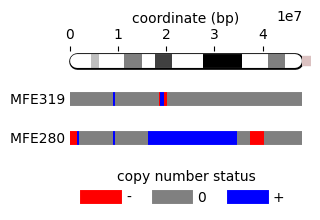

In [8]:
fig,ax=plt.subplots(
    figsize=[3,1.5],
)
_=plot_ranges(
    data=data.sort_values('sample name'),
    col_id='sample id',
    col_label='sample name',
    hue='copy number status',
    col_start='start',
    col_end='end',
    # col_sortby='sample name',
    kind='joined',
    start=0,end=48200001,
    cytobands=cytobands,
    colors={'-':'r','0':'gray','+':'b'},
    show_segments=False,
    ax=ax,
    test=False,
    )
plt.savefig(f"{output_dir_path}/ranges_joined.png",bbox_inches='tight')

#### Show numerical values 

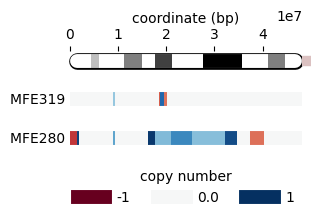

In [9]:
fig,ax=plt.subplots(
    figsize=[3,1.5],
)
_=plot_ranges(
    data=data.sort_values('sample name'),
    col_id='sample id',
    col_label='sample name',
    hue='copy number',
    col_start='start',
    col_end='end',
    # col_sortby='sample name',
    kind='joined',
    start=0,end=48200001,
    cytobands=cytobands,    
    palette='RdBu', ## colormap
    hue_lim=[-1,1], ## limits on values shown
    show_segments=False,
    ax=ax,
    test=False,
    )
plt.savefig(f"{output_dir_path}/ranges_joined_numerical.png",bbox_inches='tight')

### `split` layout

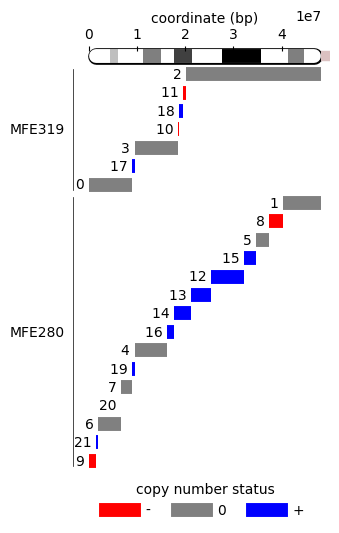

In [10]:
fig,ax=plt.subplots(
    figsize=[3,len(data)*0.25],
)
_=plot_ranges(
    data=data.sort_values(['sample id','start']),
    col_id='segment id',
    hue='copy number status',
    col_start='start',
    col_end='end',
    # col_sortby=['sample id','start'],
    col_groupby='sample name',
    start=0,end=48200001,
    cytobands=cytobands,
    colors={'-':'r','0':'gray','+':'b'},
    show_segments=False,
    ax=ax,
    )
plt.savefig(f"{output_dir_path}/ranges_split.png",bbox_inches='tight')

#### Show numerical values 

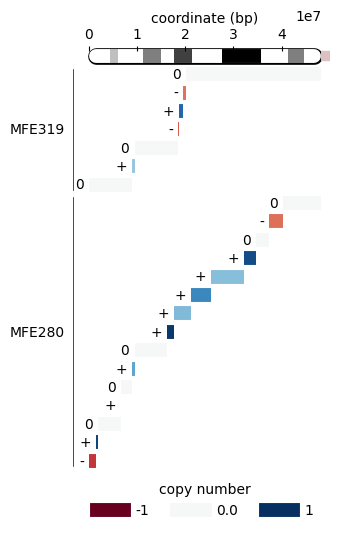

In [11]:
fig,ax=plt.subplots(
    figsize=[3,len(data)*0.25],
)
_=plot_ranges(
    data=data.sort_values(['sample id','start']),
    col_id='segment id',
    hue='copy number',
    col_start='start',
    col_end='end',
    # col_sortby=['sample id','start'],
    col_groupby='sample name',
    start=0,end=48200001,
    cytobands=cytobands,   
    palette='RdBu', ## colormap
    hue_lim=[-1,1], ## limits on values shown
    show_segments=False,
    col_label='copy number status',
    ax=ax,
    test=False,
    )
plt.savefig(f"{output_dir_path}/ranges_split_numerical.png",bbox_inches='tight')